While compare the derivatives of our observables $P_\ell$ and $B_0$, I found that there were significant differences among the RSD directions. Tests from these [notebook](https://github.com/changhoonhahn/eMaNu/blob/76a99df4678d1105c0b3af13c20207eed33698eb/nb/hod/catalog_hod_rsd.ipynb), [notebook](https://github.com/changhoonhahn/eMaNu/blob/76a99df4678d1105c0b3af13c20207eed33698eb/nb/hod/rsd_directions.ipynb) suggest that this is caused from the way halotools sample satellite galaxies for a given HOD seed.

I've calculated the observables for extra HOD seeds in order to see whether there are still significant differences among the RSD directions for the observables and the derivatives. 


## 08/19/2020 update
I've finished running all 500 realizations for HOD seeds 0 to 4 and have updated the notebook to use all of the realizations

In [1]:
import os 
import h5py 
import numpy as np
# --- eMaNu --- 
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
kf = 2.*np.pi/1000. # fundmaentla mode
kmax = 0.5

# $P_g$ comparison
Lets first look at the powerspectrum

In [15]:
def P_rsds(theta, seed): 
    _p0 = Obvs.quijhod_Pk(theta, seed=seed, rsd=0, flag='reg', silent=False) 
    _p1 = Obvs.quijhod_Pk(theta, seed=seed, rsd=1, flag='reg', silent=False) 
    _p2 = Obvs.quijhod_Pk(theta, seed=seed, rsd=2, flag='reg', silent=False)
    return [_p0, _p1, _p2]

def P_rsd_seeds(theta, seeds): 
    _p0, _p1, _p2 = [], [], [] 
    for seed in seeds: 
        __p0 = Obvs.quijhod_Pk(theta, seed=seed, rsd=0, flag='reg', silent=False)
        __p1 = Obvs.quijhod_Pk(theta, seed=seed, rsd=1, flag='reg', silent=False)
        __p2 = Obvs.quijhod_Pk(theta, seed=seed, rsd=2, flag='reg', silent=False)

        _p0.append(__p0['p0k'])
        _p1.append(__p1['p0k'])
        _p2.append(__p2['p0k'])
    _pk_all = [np.concatenate(_p0, axis=0), np.concatenate(_p1, axis=0), np.concatenate(_p2, axis=0)]
    print(_pk_all[0].shape)
    return _pk_all

In [11]:
p_omms = [P_rsds('Om_m', seed) for seed in range(5)]

['quijhod_P_Om_m.reg.seed0.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed0.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed0.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd2.hdf5']


In [12]:
p_omps = [P_rsds('Om_p', seed) for seed in range(5)]

['quijhod_P_Om_p.reg.seed0.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed0.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed0.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed3.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed3.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed3.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed4.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed4.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed4.rsd2.hdf5']


In [13]:
k = p_omms[0][0]['k']
pklim = (k <= kmax)

['quijhod_P_Om_m.reg.seed0.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed0.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed0.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd2.hdf5']
(2500, 886)


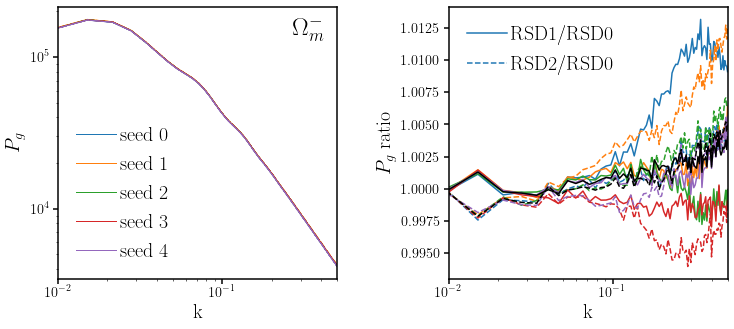

In [16]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(121)
for i, p_omm in enumerate(p_omms): 
    sub.plot(k[pklim], np.average(p_omm[0]['p0k'], axis=0)[pklim], c='C%i' %i, ls='-', lw=1, label='seed %i' %i)
    sub.plot(k[pklim], np.average(p_omm[1]['p0k'], axis=0)[pklim], c='C%i' %i, ls='--', lw=1)
    sub.plot(k[pklim], np.average(p_omm[2]['p0k'], axis=0)[pklim], c='C%i' %i, ls='-.', lw=1)
sub.text(0.95, 0.95, r'$\Omega_m^-$', transform=sub.transAxes, fontsize=25, ha='right', va='top')
sub.legend(loc='lower left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_g$', fontsize=20)
sub.set_yscale('log')

sub = fig.add_subplot(122)
for i, p_omm in enumerate(p_omms): 
    _plt_rsd1, = sub.plot(k[pklim], 
                          np.average(p_omm[1]['p0k'], axis=0)[pklim]/np.average(p_omm[0]['p0k'], axis=0)[pklim], 
                          c='C%i' % i, ls='-')
    _plt_rsd2, = sub.plot(k[pklim], 
                          np.average(p_omm[2]['p0k'], axis=0)[pklim]/np.average(p_omm[0]['p0k'], axis=0)[pklim], 
                          c='C%i' % i, ls='--')
    if i == 0: 
        sub.legend([_plt_rsd1, _plt_rsd2], ['RSD1/RSD0', 'RSD2/RSD0'], 
            loc='upper left', handletextpad=0.2, fontsize=20)
        
p_omm = P_rsd_seeds('Om_m', range(5))
sub.plot(k[pklim], np.average(p_omm[1], axis=0)[pklim]/np.average(p_omm[0], axis=0)[pklim], c='k', ls='-')
sub.plot(k[pklim], np.average(p_omm[2], axis=0)[pklim]/np.average(p_omm[0], axis=0)[pklim], c='k', ls='--')

sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_g$ ratio', fontsize=20)

fig.subplots_adjust(wspace=0.4)

['quijhod_P_Om_p.reg.seed0.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed0.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed0.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed3.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed3.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed3.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed4.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed4.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed4.rsd2.hdf5']
(2500, 886)


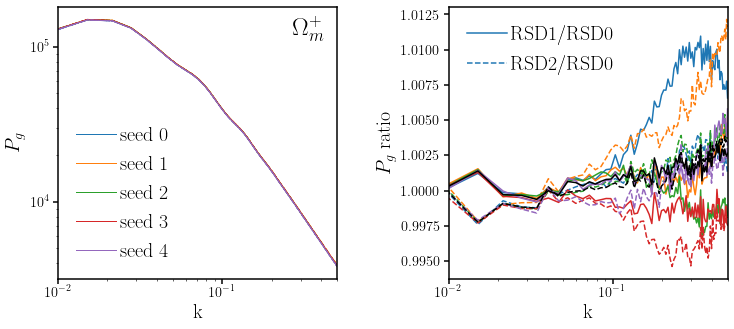

In [17]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(121)
for i, _ps in enumerate(p_omps): 
    sub.plot(k[pklim], np.average(_ps[0]['p0k'], axis=0)[pklim], c='C%i' %i, ls='-', lw=1, label='seed %i' %i)
    sub.plot(k[pklim], np.average(_ps[1]['p0k'], axis=0)[pklim], c='C%i' %i, ls='--', lw=1)
    sub.plot(k[pklim], np.average(_ps[2]['p0k'], axis=0)[pklim], c='C%i' %i, ls='-.', lw=1)
sub.text(0.95, 0.95, r'$\Omega_m^+$', transform=sub.transAxes, fontsize=25, ha='right', va='top')
sub.legend(loc='lower left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_g$', fontsize=20)
sub.set_yscale('log')

sub = fig.add_subplot(122)
for i, _ps in enumerate(p_omps): 
    _plt_rsd1, = sub.plot(k[pklim], 
                          np.average(_ps[1]['p0k'], axis=0)[pklim]/np.average(_ps[0]['p0k'], axis=0)[pklim], 
                          c='C%i' % i, ls='-')
    _plt_rsd2, = sub.plot(k[pklim], 
                          np.average(_ps[2]['p0k'], axis=0)[pklim]/np.average(_ps[0]['p0k'], axis=0)[pklim], 
                          c='C%i' % i, ls='--')
    if i == 0: 
        sub.legend([_plt_rsd1, _plt_rsd2], ['RSD1/RSD0', 'RSD2/RSD0'], 
            loc='upper left', handletextpad=0.2, fontsize=20)
        
p_omp = P_rsd_seeds('Om_p', range(5))
sub.plot(k[pklim], np.average(p_omp[1], axis=0)[pklim]/np.average(p_omp[0], axis=0)[pklim], c='k', ls='-')
sub.plot(k[pklim], np.average(p_omp[2], axis=0)[pklim]/np.average(p_omp[0], axis=0)[pklim], c='k', ls='--')

sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$P_g$ ratio', fontsize=20)

fig.subplots_adjust(wspace=0.4)

['quijhod_P_Om_m.reg.seed0.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed0.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed0.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed1.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed2.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed3.rsd2.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd0.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd1.hdf5']
['quijhod_P_Om_m.reg.seed4.rsd2.hdf5']
(2500, 886)
['quijhod_P_Om_p.reg.seed0.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed0.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed0.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed1.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd0.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd1.hdf5']
['quijhod_P_Om_p.reg.seed2.rsd2.hdf5']
['quijhod_P_Om_p.reg.seed3.rsd0.hdf5']
['quijhod_P_O

(0.95, 1.05)

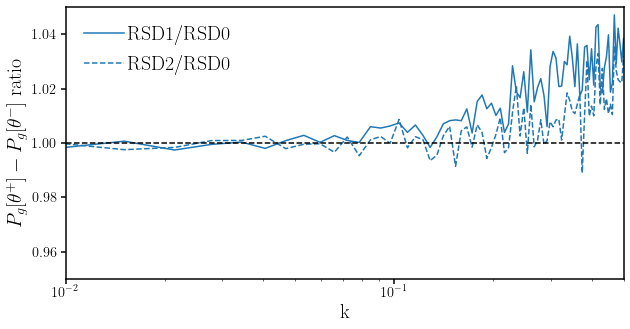

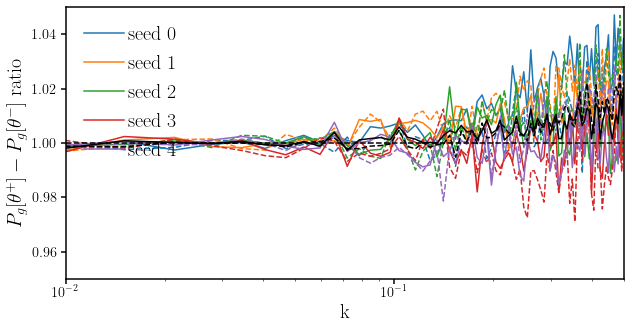

In [18]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i, _pms, _pps in zip(range(1), p_omms, p_omps): 
    
    dp0 = np.average(_pps[0]['p0k'], axis=0)[pklim] - np.average(_pms[0]['p0k'], axis=0)[pklim]
    dp1 = np.average(_pps[1]['p0k'], axis=0)[pklim] - np.average(_pms[1]['p0k'], axis=0)[pklim]
    dp2 = np.average(_pps[2]['p0k'], axis=0)[pklim] - np.average(_pms[2]['p0k'], axis=0)[pklim]

    _plt_rsd1, = sub.plot(k[pklim], dp1/dp0, c='C%i' % i, ls='-')
    _plt_rsd2, = sub.plot(k[pklim], dp2/dp0, c='C%i' % i, ls='--')
    if i == 0: 
        sub.legend([_plt_rsd1, _plt_rsd2], ['RSD1/RSD0', 'RSD2/RSD0'], 
            loc='upper left', handletextpad=0.2, fontsize=20)
sub.plot([1e-2, 0.5], [1., 1.], c='k', ls='--')
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel(r'$P_g[\theta^+] - P_g[\theta^-]$ ratio', fontsize=20)
sub.set_ylim(0.95, 1.05)


fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i, _pms, _pps in zip(range(5), p_omms, p_omps): 
    
    dp0 = np.average(_pps[0]['p0k'], axis=0)[pklim] - np.average(_pms[0]['p0k'], axis=0)[pklim]
    dp1 = np.average(_pps[1]['p0k'], axis=0)[pklim] - np.average(_pms[1]['p0k'], axis=0)[pklim]
    dp2 = np.average(_pps[2]['p0k'], axis=0)[pklim] - np.average(_pms[2]['p0k'], axis=0)[pklim]

    _plt_rsd1, = sub.plot(k[pklim], dp1/dp0, c='C%i' % i, ls='-', label='seed %i' % i)
    _plt_rsd2, = sub.plot(k[pklim], dp2/dp0, c='C%i' % i, ls='--')
    
p_omm = P_rsd_seeds('Om_m', range(5))
p_omp = P_rsd_seeds('Om_p', range(5))
dp0 = np.average(p_omp[0], axis=0)[pklim] - np.average(p_omm[0], axis=0)[pklim]
dp1 = np.average(p_omp[1], axis=0)[pklim] - np.average(p_omm[1], axis=0)[pklim]
dp2 = np.average(p_omp[2], axis=0)[pklim] - np.average(p_omm[2], axis=0)[pklim]

sub.plot(k[pklim], dp1/dp0, c='k', ls='-')
sub.plot(k[pklim], dp2/dp0, c='k', ls='--')
    
sub.plot([1e-2, 0.5], [1., 1.], c='k', ls='--')
sub.legend(loc='upper left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim(1e-2, 0.5)
sub.set_xscale('log')
sub.set_ylabel(r'$P_g[\theta^+] - P_g[\theta^-]$ ratio', fontsize=20)
sub.set_ylim(0.95, 1.05)

In [20]:
def B_rsds(theta, seed): 
    _b0 = Obvs.quijhod_Bk(theta, seed=seed, rsd=0, flag='reg', silent=False) 
    _b1 = Obvs.quijhod_Bk(theta, seed=seed, rsd=1, flag='reg', silent=False) 
    _b2 = Obvs.quijhod_Bk(theta, seed=seed, rsd=2, flag='reg', silent=False) 
    return [_b0, _b1, _b2]


def B_rsd_seeds(theta, seeds): 
    _b0, _b1, _b2 = [], [], [] 
    for seed in seeds: 
        __b0 = Obvs.quijhod_Bk(theta, seed=seed, rsd=0, flag='reg', silent=False) 
        __b1 = Obvs.quijhod_Bk(theta, seed=seed, rsd=1, flag='reg', silent=False) 
        __b2 = Obvs.quijhod_Bk(theta, seed=seed, rsd=2, flag='reg', silent=False) 
        print(__b0['b123'].shape)
        _b0.append(__b0['b123'])
        _b1.append(__b1['b123'])
        _b2.append(__b2['b123'])
    print(np.concatenate(_b0, axis=0).shape)
    return [np.concatenate(_b0, axis=0), np.concatenate(_b1, axis=0), np.concatenate(_b2, axis=0)]

In [21]:
b_omms = [B_rsds('Om_m', seed) for seed in range(5)]
b_omps = [B_rsds('Om_p', seed) for seed in range(5)]

['quijhod_B_Om_m.reg.seed0.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd2.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd2.hdf5']
['quijhod_B_Om_m.reg.seed2.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed2.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed2.rsd2.hdf5']
['quijhod_B_Om_m.reg.seed3.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed3.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed3.rsd2.hdf5']
['quijhod_B_Om_m.reg.seed4.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed4.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed4.rsd2.hdf5']
['quijhod_B_Om_p.reg.seed0.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed0.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed0.rsd2.hdf5']
['quijhod_B_Om_p.reg.seed1.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed1.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed1.rsd2.hdf5']
['quijhod_B_Om_p.reg.seed2.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed2.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed2.rsd2.hdf5']
['quijhod_B_Om_p.reg.seed3.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed

In [22]:
i_k, j_k, l_k = b_omms[0][0]['k1'], b_omms[0][0]['k2'], b_omms[0][0]['k3']
bklim = ((i_k*kf <= kmax) & (j_k*kf <= kmax) & (l_k*kf <= kmax)) # k limit

['quijhod_B_Om_m.reg.seed0.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed1.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed2.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed2.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed2.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed3.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed3.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed3.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed4.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed4.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed4.rsd2.hdf5']
(500, 6350)
(2500, 6350)


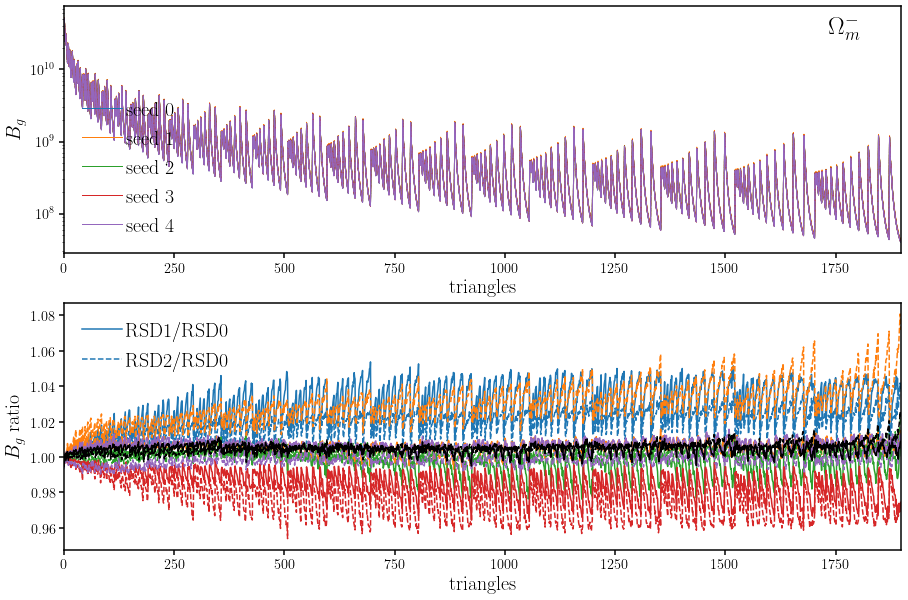

In [23]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(211)
for i, b_omm in enumerate(b_omms): 
    sub.plot(np.average(b_omm[0]['b123'], axis=0)[bklim], c='C%i' %i, ls='-', lw=1, label='seed %i' %i)
    sub.plot(np.average(b_omm[1]['b123'], axis=0)[bklim], c='C%i' %i, ls='--', lw=1)
    sub.plot(np.average(b_omm[2]['b123'], axis=0)[bklim], c='C%i' %i, ls='-.', lw=1)
sub.text(0.95, 0.95, r'$\Omega_m^-$', transform=sub.transAxes, fontsize=25, ha='right', va='top')
sub.legend(loc='lower left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangles', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$', fontsize=20)
sub.set_yscale('log')

sub = fig.add_subplot(212)
for i, b_omm in enumerate(b_omms): 
    _p_ratio1 = np.average(b_omm[1]['b123'], axis=0)[bklim]/np.average(b_omm[0]['b123'], axis=0)[bklim]
    _p_ratio2 = np.average(b_omm[2]['b123'], axis=0)[bklim]/np.average(b_omm[0]['b123'], axis=0)[bklim] 

    _plt_rsd1, = sub.plot(_p_ratio1, c='C%i' % i, ls='-')
    _plt_rsd2, = sub.plot(_p_ratio2, c='C%i' % i, ls='--')
    if i == 0: 
        sub.legend([_plt_rsd1, _plt_rsd2], ['RSD1/RSD0', 'RSD2/RSD0'], 
            loc='upper left', handletextpad=0.2, fontsize=20)
        
b_omm = B_rsd_seeds('Om_m', range(5))
sub.plot(np.average(b_omm[1], axis=0)[bklim]/np.average(b_omm[0], axis=0)[bklim], c='k', ls='-')
sub.plot(np.average(b_omm[2], axis=0)[bklim]/np.average(b_omm[0], axis=0)[bklim], c='k', ls='--')

sub.set_xlabel('triangles', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

fig.subplots_adjust(wspace=0.4)

['quijhod_B_Om_p.reg.seed0.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed0.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed0.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_p.reg.seed1.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed1.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed1.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_p.reg.seed2.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed2.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed2.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_p.reg.seed3.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed3.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed3.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_p.reg.seed4.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed4.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed4.rsd2.hdf5']
(500, 6350)
(2500, 6350)


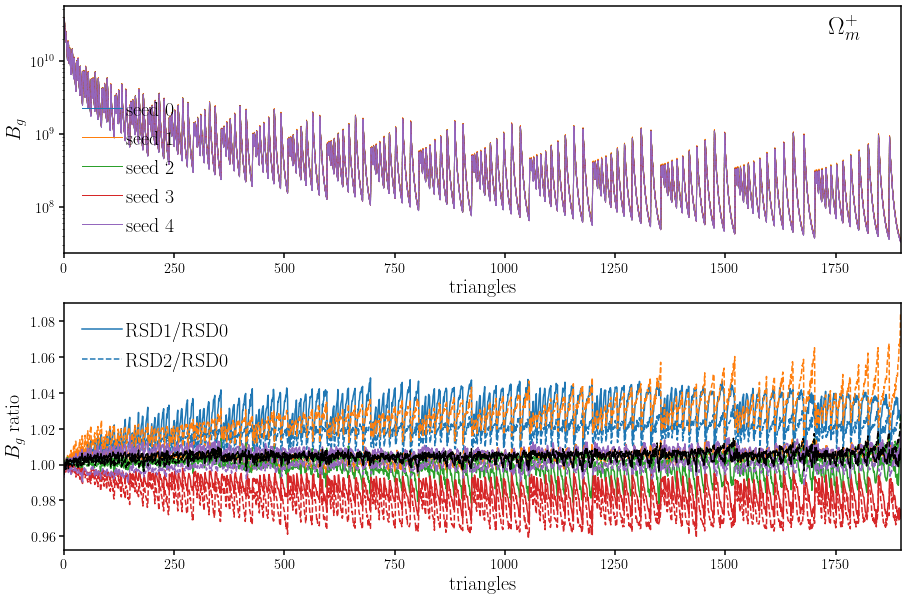

In [24]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(211)
for i, _bs in enumerate(b_omps): 
    sub.plot(np.average(_bs[0]['b123'], axis=0)[bklim], c='C%i' %i, ls='-', lw=1, label='seed %i' %i)
    sub.plot(np.average(_bs[1]['b123'], axis=0)[bklim], c='C%i' %i, ls='--', lw=1)
    sub.plot(np.average(_bs[2]['b123'], axis=0)[bklim], c='C%i' %i, ls='-.', lw=1)
sub.text(0.95, 0.95, r'$\Omega_m^+$', transform=sub.transAxes, fontsize=25, ha='right', va='top')
sub.legend(loc='lower left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangles', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$', fontsize=20)
sub.set_yscale('log')

sub = fig.add_subplot(212)
for i, _bs in enumerate(b_omps): 
    _b_ratio1 = np.average(_bs[1]['b123'], axis=0)[bklim]/np.average(_bs[0]['b123'], axis=0)[bklim]
    _b_ratio2 = np.average(_bs[2]['b123'], axis=0)[bklim]/np.average(_bs[0]['b123'], axis=0)[bklim] 

    _plt_rsd1, = sub.plot(_b_ratio1, c='C%i' % i, ls='-')
    _plt_rsd2, = sub.plot(_b_ratio2, c='C%i' % i, ls='--')
    if i == 0: 
        sub.legend([_plt_rsd1, _plt_rsd2], ['RSD1/RSD0', 'RSD2/RSD0'], 
            loc='upper left', handletextpad=0.2, fontsize=20)

b_omp = B_rsd_seeds('Om_p', range(5))
sub.plot(np.average(b_omp[1], axis=0)[bklim]/np.average(b_omp[0], axis=0)[bklim], c='k', ls='-')
sub.plot(np.average(b_omp[2], axis=0)[bklim]/np.average(b_omp[0], axis=0)[bklim], c='k', ls='--')        
        
sub.set_xlabel('triangles', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$B_g$ ratio', fontsize=20)

fig.subplots_adjust(wspace=0.4)

['quijhod_B_Om_m.reg.seed0.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed0.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed1.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed1.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed2.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed2.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed2.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed3.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed3.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed3.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_m.reg.seed4.rsd0.hdf5']
['quijhod_B_Om_m.reg.seed4.rsd1.hdf5']
['quijhod_B_Om_m.reg.seed4.rsd2.hdf5']
(500, 6350)
(2500, 6350)
['quijhod_B_Om_p.reg.seed0.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed0.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed0.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_p.reg.seed1.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed1.rsd1.hdf5']
['quijhod_B_Om_p.reg.seed1.rsd2.hdf5']
(500, 6350)
['quijhod_B_Om_p.reg.seed2.rsd0.hdf5']
['quijhod_B_Om_p.reg.seed2.rsd1.hdf5']
['quij

Text(0, 0.5, '$B_g[\\theta^+] - B_g[\\theta^-]$ ratio')

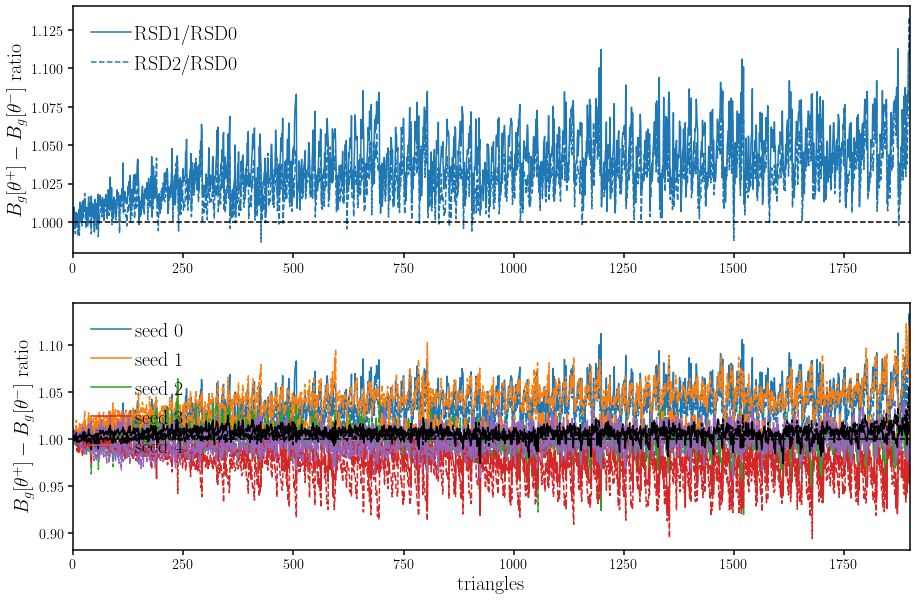

In [25]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(211)
for i, _bms, _bps in zip(range(1), b_omms, b_omps): 
    db0 = np.average(_bps[0]['b123'], axis=0)[bklim] - np.average(_bms[0]['b123'], axis=0)[bklim]
    db1 = np.average(_bps[1]['b123'], axis=0)[bklim] - np.average(_bms[1]['b123'], axis=0)[bklim]
    db2 = np.average(_bps[2]['b123'], axis=0)[bklim] - np.average(_bms[2]['b123'], axis=0)[bklim]

    _plt_rsd1, = sub.plot(db1/db0, c='C%i' % i, ls='-')
    _plt_rsd2, = sub.plot(db2/db0, c='C%i' % i, ls='--')
    if i == 0: 
        sub.legend([_plt_rsd1, _plt_rsd2], ['RSD1/RSD0', 'RSD2/RSD0'], 
            loc='upper left', handletextpad=0.2, fontsize=20)
sub.plot([0., np.sum(bklim)], [1., 1.], c='k', ls='--')
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel(r'$B_g[\theta^+] - B_g[\theta^-]$ ratio', fontsize=20)
#sub.set_ylim(0.95, 1.05)

sub = fig.add_subplot(212)
for i, _bms, _bps in zip(range(5), b_omms, b_omps): 
    db0 = np.average(_bps[0]['b123'], axis=0)[bklim] - np.average(_bms[0]['b123'], axis=0)[bklim]
    db1 = np.average(_bps[1]['b123'], axis=0)[bklim] - np.average(_bms[1]['b123'], axis=0)[bklim]
    db2 = np.average(_bps[2]['b123'], axis=0)[bklim] - np.average(_bms[2]['b123'], axis=0)[bklim]        
    
    _plt_rsd1, = sub.plot(db1/db0, c='C%i' % i, ls='-', label='seed %i' % i)
    _plt_rsd2, = sub.plot(db2/db0, c='C%i' % i, ls='--')
    
b_omm = B_rsd_seeds('Om_m', range(5))
b_omp = B_rsd_seeds('Om_p', range(5))
db0 = np.average(b_omp[0], axis=0)[bklim] - np.average(b_omm[0], axis=0)[bklim]
db1 = np.average(b_omp[1], axis=0)[bklim] - np.average(b_omm[1], axis=0)[bklim]
db2 = np.average(b_omp[2], axis=0)[bklim] - np.average(b_omm[2], axis=0)[bklim]

sub.plot(db1/db0, c='k', ls='-')
sub.plot(db2/db0, c='k', ls='--')
    
sub.plot([0., np.sum(bklim)], [1., 1.], c='k', ls='--')
sub.legend(loc='upper left', handletextpad=0.2, fontsize=20)
sub.set_xlabel('triangles', fontsize=20)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel(r'$B_g[\theta^+] - B_g[\theta^-]$ ratio', fontsize=20)
#sub.set_ylim(0.95, 1.05)